# Homework 2 - Logistic Regression

In this assignment, you will learn how to implement binary logistic regression using numpy.

## Task 1: Inspect and Plot the Data

First, let's generate some realistic and noisy 2-dimensional data and plot it.

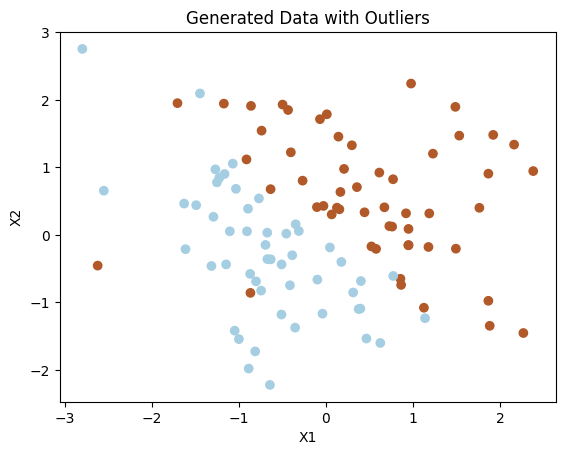

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some realistic and noisy 2D data
np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(np.float64)
y += 0.1 * np.random.randn(100)  # add noise
y = (y > 0.5).astype(np.float64)  # convert to binary labels

# Add 5% outlier points
num_outliers = int(0.05 * X.shape[0])
outliers_X = np.random.uniform(low=-3, high=3, size=(num_outliers, 2))
outliers_y = np.random.randint(0, 2, size=num_outliers).astype(np.float64)

# Combine original data with outliers
X = np.vstack([X, outliers_X])
y = np.hstack([y, outliers_y])

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Data with Outliers')
plt.show()

## Task 2: Implement Logistic Regression from Scratch

Logistic regression is used for binary classification tasks. It models the probability that a given input belongs to a particular class.

### Step 1: Initialize Parameters

Let's start by initializing the model parameters.

In [34]:
# Initialize parameters
theta = np.random.randn(3, 1)
learning_rate = 0.1

### Step 2: Compute the Sigmoid Function

Implement the sigmoid function, which is used to map the predictions to probabilities.

In [35]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Step 3: Compute the Prediction and Loss (2 pt)

Implement the function to compute the predictions and the cross-entropy loss function.

In [36]:
# Add x0 = 1 to each instance
X_b = np.c_[np.ones((X.shape[0], 1)), X]

def predict(X, theta):
    # TODO: Implement the predict function, which should return the sigmoids of the linear scores for rows in X .
    y_pred = sigmoid(X @ theta)
    return y_pred

def compute_cross_entropy_loss(y, y_pred):
    # TODO: Implement the cross entropy loss. Remember to normalize the loss by the number of examples (for example, use np.mean to avg the cross entropy across examples)
    m = len(y)
    loss = -(1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

### Step 4: Compute the Gradient (1 pt)

Compute the gradient of the loss function with respect to the parameters.

In [42]:
def compute_cross_entropy_gradient(X, y, y_pred):
    # TODO: Compute and return the gradient of the cross entopy loss
    y = y.reshape(-1, 1)
    m = len(y)
    gradient = (1 / m) * X.T @ (y_pred - y)
    return gradient

### Step 5: Train the Model using Gradient Descent

Train the model using gradient descent and plot the loss over iterations. Come up with a stopping condition for training.

Iteration 1:
Theta shape: (3, 1)
Gradient shape: (3, 1)
Iteration 2:
Theta shape: (3, 1)
Gradient shape: (3, 1)
Iteration 3:
Theta shape: (3, 1)
Gradient shape: (3, 1)
Iteration 4:
Theta shape: (3, 1)
Gradient shape: (3, 1)
Iteration 5:
Theta shape: (3, 1)
Gradient shape: (3, 1)
Iteration 6:
Theta shape: (3, 1)
Gradient shape: (3, 1)
Iteration 7:
Theta shape: (3, 1)
Gradient shape: (3, 1)
Iteration 8:
Theta shape: (3, 1)
Gradient shape: (3, 1)
Iteration 9:
Theta shape: (3, 1)
Gradient shape: (3, 1)
Iteration 10:
Theta shape: (3, 1)
Gradient shape: (3, 1)
Iteration 11:
Theta shape: (3, 1)
Gradient shape: (3, 1)
Iteration 12:
Theta shape: (3, 1)
Gradient shape: (3, 1)
Iteration 13:
Theta shape: (3, 1)
Gradient shape: (3, 1)
Iteration 14:
Theta shape: (3, 1)
Gradient shape: (3, 1)
Iteration 15:
Theta shape: (3, 1)
Gradient shape: (3, 1)
Iteration 16:
Theta shape: (3, 1)
Gradient shape: (3, 1)
Iteration 17:
Theta shape: (3, 1)
Gradient shape: (3, 1)
Iteration 18:
Theta shape: (3, 1)
Gradie

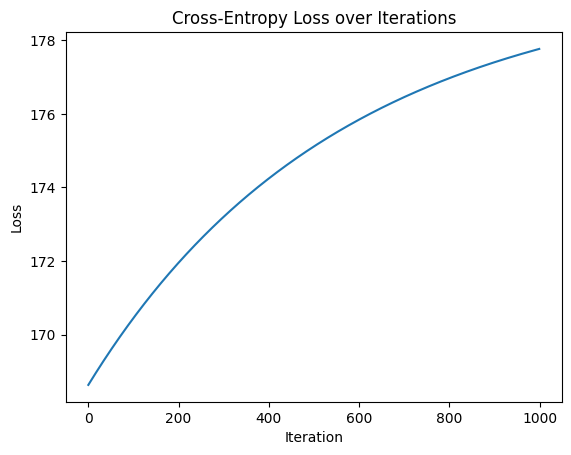

In [43]:
def gradient_descent_cross_entropy(X, y, theta, learning_rate, num_iterations, tol=1e-6):
    loss_history = []
    for i in range(num_iterations):
        y_pred = predict(X, theta)
        loss = compute_cross_entropy_loss(y, y_pred)
        loss_history.append(loss)
        gradient = compute_cross_entropy_gradient(X, y, y_pred)

        print(f'Iteration {i+1}:')
        print(f'Theta shape: {theta.shape}')
        print(f'Gradient shape: {gradient.shape}')

        theta -= learning_rate * gradient
        if np.linalg.norm(gradient) < tol:
            print(f'Stopping at iteration {i+1}')
            break
    return theta, loss_history

# Train the model
num_iterations = 1000
theta, loss_history = gradient_descent_cross_entropy(X_b, y, theta, learning_rate, num_iterations)

# Plot the cross-entropy loss over iterations
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Cross-Entropy Loss over Iterations')
plt.show()

### Step 6: Plot the Decision Boundary

Plot the decision boundary obtained from gradient descent along with the original data.

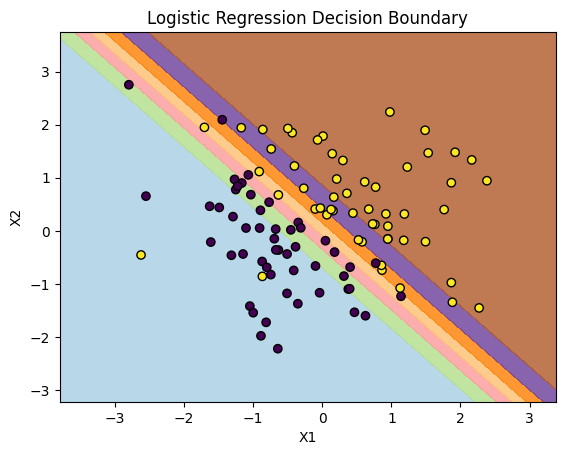

In [44]:
# Plot the decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                       np.arange(x2_min, x2_max, 0.01))
X_new = np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()]
y_predict = predict(X_new, theta)
y_predict = y_predict.reshape(xx1.shape)

plt.contourf(xx1, xx2, y_predict, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Logistic Regression Decision Boundary")
plt.show()

## Task 3: Softmax Regression and Spurious Degree of Freedom

Understand the spurious degree of freedom in softmax regression and show that binary logistic regression is a special case of softmax regression.

### Step 1: Implement Softmax Function

Implement the softmax function.

In [40]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

### Step 2: Show Spurious Degree of Freedom (1 pt)

Show that adding the same scalar to all logits doesn't change the probabilities.

In [41]:
# Define logits
logits = np.array([[1, 2], [3, 4]])

# Compute softmax probabilities
probs = softmax(logits)

# Add a scalar value to all logits (TODO: try experimenting with different values of the scalar)
scalar = 123.4
logits_shifted = logits + scalar
probs_shifted = softmax(logits_shifted)

print("Original probabilities:", probs)
print("Shifted probabilities:", probs_shifted)

Original probabilities: [[0.26894142 0.73105858]
 [0.26894142 0.73105858]]
Shifted probabilities: [[0.26894142 0.73105858]
 [0.26894142 0.73105858]]


### Step 3: Binary Logistic Regression as a Reduction of Softmax Regression

We know that the softmax function for the logits $z = [z_1, z_2]$ is defined as:
$$ \text{softmax}(z_i) = \frac{e^{z_i}}{e^{z_1} + e^{z_2}} $$

For binary classification, we can consider the logits $z = [0, z]$, where we set the first logit to 0 to remove the spurious degree of freedom.

Thus, the softmax probabilities become:
$$ \text{softmax}(0, z) = \left[ \frac{e^0}{e^0 + e^z}, \frac{e^z}{1 + e^z} \right] $$

Notice that the probability of the second class is:
$$ \frac{e^z}{1 + e^z} $$

This is exactly the sigmoid function:
$$ \sigma(z) = \frac{1}{1 + e^{-z}} = \frac{e^z}{1 + e^z} $$

Hence, we have shown that binary logistic regression using the sigmoid function is equivalent to multiclass (softmax) logistic regression when $K = 2$ classes.